In [66]:
from PIL import Image
import numpy as np

# Open image file
# im = Image.open('/Users/yanghongguo/Desktop/EPOC premalignant trial-imaging AI study-017-1_21600x8416_40X.png')
im = Image.open('/Users/yanghongguo/Desktop/EPOC premalignant trial-imaging AI study-019_67072x54880_40X.png')
# im = Image.open('/Users/yanghongguo/Desktop/EPOC premalignant trial-imaging AI study-015_6688x14560_40X.png')

im_resize = im.resize((4000, 4000),Image.LANCZOS)
# Convert image to numpy array
arr = np.array(im_resize)

# Print array shape and type
print("Array shape:", arr.shape)
print("Array type:", arr.dtype)


Array shape: (4000, 4000, 3)
Array type: uint8


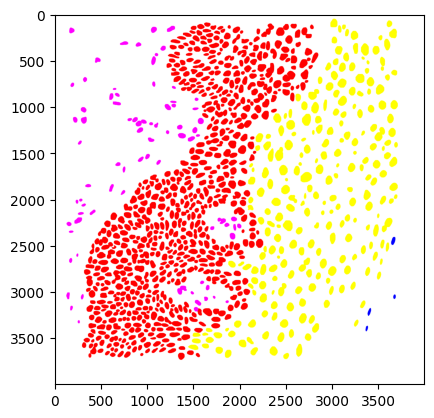

In [67]:
import matplotlib.pyplot as plt

# Create plot
plt.imshow(arr)

# Show plot
plt.show()

In [61]:
flat_img = arr.reshape(-1, 3)
flat_img.shape

(16000000, 3)

In [62]:
# Find the unique values in the flattened array
unique_colors = np.unique(flat_img, axis=0)
unique_colors

array([[255,   0,   0],
       [255,   0, 255],
       [255, 255,   0],
       [255, 255, 255]], dtype=uint8)

In [63]:
# Calculate the number of unique colors
num_colors = len(unique_colors)

print(num_colors)

4


In [24]:
filtered_arr = flat_img[(flat_img[:,0] == 255 ) & (flat_img[:,1] ==0) & (flat_img[:,2] ==0)]

In [39]:
filtered_arr = flat_img[(flat_img[:,0] > 250 ) & (flat_img[:,1] <4) & (flat_img[:,2] <4)]


In [40]:
filtered_arr.shape

(45475, 3)

In [49]:
# # define the conditions for each RGB value
# red_cond = arr[..., 0] >= 250
# green_cond = arr[..., 1] <= 5
# blue_cond = arr[..., 2] <= 5

# # combine the conditions using logical operators
# red_mask = red_cond & green_cond & blue_cond

# arr[red_mask] = [255, 0, 0]
# arr[~red_mask] = [255, 255, 255]

In [68]:
red_mask = (arr== [255, 0, 0]).all(axis=-1)

# Set the red pixels to red and all other pixels to white
arr[red_mask] = [255, 0, 0]
arr[~red_mask] = [255, 255, 255]

In [69]:
im_arr = Image.fromarray(arr)
im_arr.save('/Users/yanghongguo/Desktop/output_2.png')

In [34]:
arr.shape

(4000, 4000, 3)

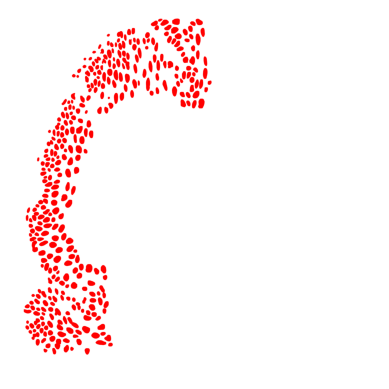

In [33]:
# Create plot
plt.imshow(arr)
plt.axis('off')
plt.savefig('output.png')
# Show plot
plt.show()


In [20]:
nonwhite_mask = np.any(arr != [255, 255, 255], axis=-1)
y_indices, x_indices = np.where(nonwhite_mask)

In [21]:
# print the x and y indices
print("X indices:", x_indices)
print("Y indices:", y_indices)

X indices: [1804 1805 1806 ...  836  837  838]
Y indices: [ 103  103  103 ... 3735 3735 3735]


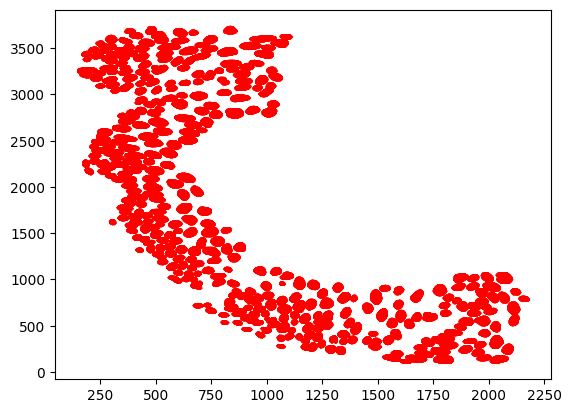

<Figure size 600x400 with 0 Axes>

In [22]:
# plot the points
plt.scatter(x_indices, y_indices, c='red', s=0.01, alpha=1)

plt.figure(figsize=(6, 4))

# show the plot
plt.show()

In [23]:
import pandas as pd
location = pd.DataFrame({'x': x_indices, 'y': y_indices})
location.to_csv('location3.csv', index=False)

In [72]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings("ignore",category=FutureWarning)


# Load the image
img = cv2.imread('/Users/yanghongguo/Desktop/output.png')

In [73]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary mask
ret, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# # Create a binary mask for non-white pixels
# mask = gray != 255

# # Apply the mask to the binary image
# thresh[~mask] = 0




Number of Separated Regions: 376


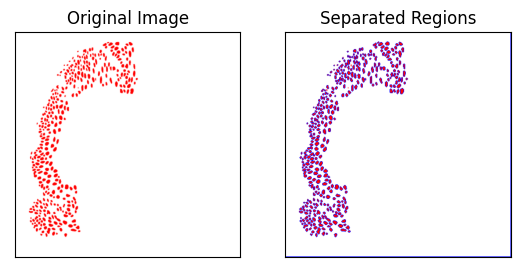

In [74]:
# Find the contours in the binary mask
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a new image
# regions = np.zeros_like(img)
regions = img.copy()
cv2.drawContours(regions, contours, -1, (255, 0, 0), 1)

# Count the number of separated regions
num_regions = len(contours)

# Display the results
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(regions, cv2.COLOR_BGR2RGB))
plt.title('Separated Regions'), plt.xticks([]), plt.yticks([])
# plt.show()

print('Number of Separated Regions:', num_regions)

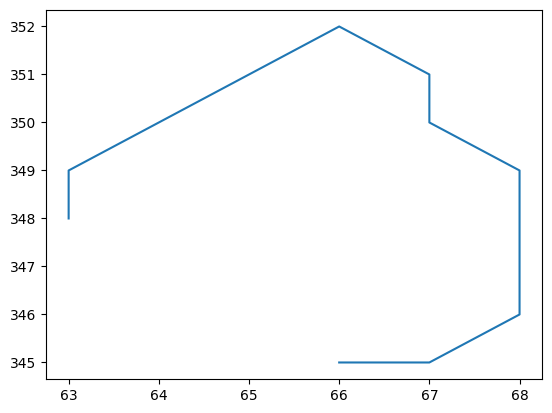

In [75]:
# Plot the contour using plt.plot()
contour = contours[5]
x = contour[:, 0, 0]
y = contour[:, 0, 1]
plt.plot(x, y)

# Display the plot
# plt.imshow(img_contour)
plt.show()

In [76]:

# # Create a dataframe to store the pixel data
# df = pd.DataFrame(columns=['x', 'y', 'contour'])

# # Iterate over each contour
# for i in range(len(contours)):
#     contour = contours[i]
    
#     # Iterate over each pixel in the image
#     for x in range(img.shape[1]):
#         for y in range(img.shape[0]):
#             if cv2.pointPolygonTest(contour, (x, y), False) >= 0:
#                 # The pixel is inside the contour
#                 df = df.append({'x': x, 'y': y, 'contour': i}, ignore_index=True)

# # Display the dataframe
# print(df.head())


In [77]:
# Create a dataframe to store the pixel data
df = pd.DataFrame(columns=['x', 'y', 'contour'])

# Iterate over each contour
for i in range(len(contours)):
    contour = contours[i]
    
    # Create a binary mask for the contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    
    # Extract the non-zero pixels in the mask
    points = cv2.findNonZero(mask)
    
    # Add the pixel data to the dataframe
    for point in points:
        x, y = point[0]
        df = df.append({'x': x, 'y': y, 'contour': i}, ignore_index=True)

# Display the dataframe
print(df.head())


   x  y contour
0  0  0       0
1  1  0       0
2  2  0       0
3  3  0       0
4  4  0       0


In [78]:
df_filtered = df[df['contour'] > 0]

In [79]:
df_filtered.head()

,x,y,contour
151321,86,348,1
151322,87,348,1
151323,88,348,1
151324,85,349,1
151325,86,349,1


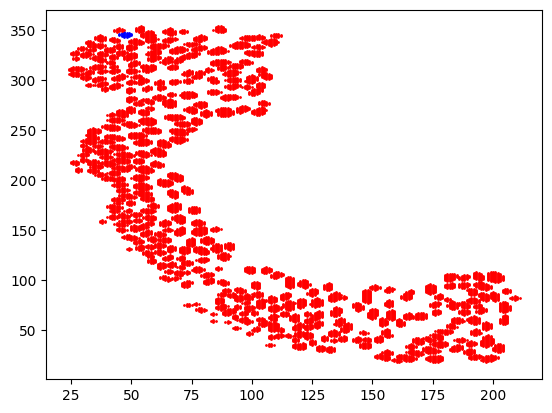

In [81]:
# plt.scatter(df_filtered[df_filtered['contour'] == 2].x, df_filtered[df_filtered['contour'] == 2].y)
# plt.scatter(df_filtered.x, df_filtered.y, s = 1)
i = 7
plt.scatter(df_filtered[df_filtered['contour'] == i].x, df_filtered[df_filtered['contour'] == i].y, color='blue', s = 1)
plt.scatter(df_filtered[df_filtered['contour'] != i].x, df_filtered[df_filtered['contour'] != i].y, color='red', s = 1)



plt.show()

In [196]:
os.getcwd()

'/Users/yanghongguo/Desktop/Research/Stratification'

In [242]:
df_filtered.to_csv('location2_region.csv', index=False)

In [15]:
from PIL import Image
import numpy as np

# Open image file
# im = Image.open('/Users/yanghongguo/Desktop/EPOC premalignant trial-imaging AI study-017-1_21600x8416_40X.png')
im = Image.open('/Users/yanghongguo/Desktop/Research/iBurst/data/multisample data/original data/images/annotation/E1.jpg')
im_2 = Image.open("/Users/yanghongguo/Desktop/Research/iBurst/data/multisample data/original data/images/HE/E1.jpg")

# im_resize = im.resize((4000, 4000),Image.LANCZOS)
# Convert image to numpy array
arr = np.array(im)
arr_2 = np.array(im_2)

# Print array shape and type
print("Array shape:", arr.shape)
print("Array shape:", arr_2.shape)
# print("Array type:", arr.dtype)

/Users/yanghongguo/anaconda3/envs/py3.9/lib/python3.9/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (92492884 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Array shape: (6160, 5787, 3)
Array shape: (9922, 9322, 3)


In [16]:
im_resize = im.resize((arr_2.shape[1], arr_2.shape[0]),Image.LANCZOS)
arr = np.array(im_resize)

In [17]:
print("Array shape:", arr.shape)

Array shape: (9922, 9322, 3)


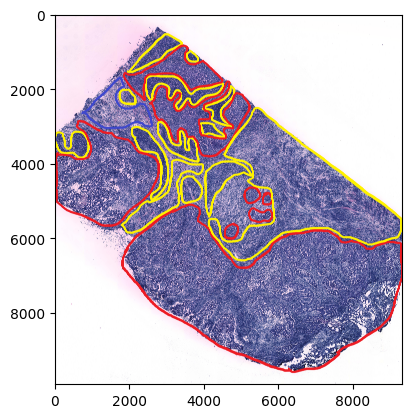

In [18]:
import matplotlib.pyplot as plt
plt.imshow(arr)
plt.show()

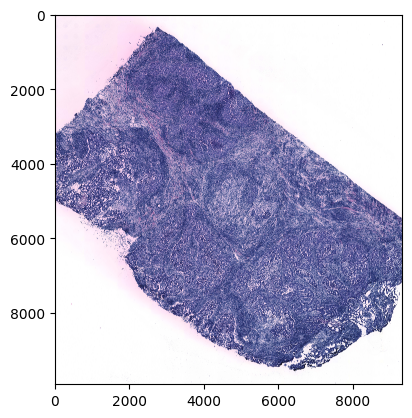

In [19]:
plt.imshow(arr_2)
plt.show()

In [20]:
im_arr = Image.fromarray(arr)
im_arr.save('/Users/yanghongguo/Desktop/E1.png')